In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target
print(X.head())
print(X.describe())  # Stats like mean, std
print(y.describe())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   


In [3]:
corr = X.corr(); print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)  # Regularization to reduce overfitting
ridge_model.fit(X_train, y_train)

Ridge()

Linear MSE: 24.29, R2: 0.67
Ridge MSE: 24.31, R2: 0.67


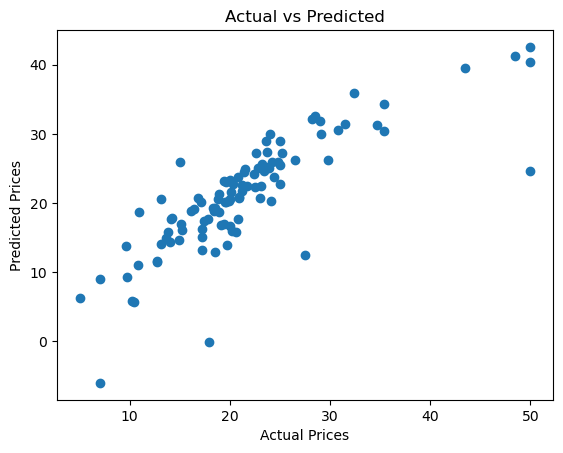

In [6]:
lr_preds = lr_model.predict(X_test)
print(f"Linear MSE: {mean_squared_error(y_test, lr_preds):.2f}, R2: {r2_score(y_test, lr_preds):.2f}")

ridge_preds = ridge_model.predict(X_test)
print(f"Ridge MSE: {mean_squared_error(y_test, ridge_preds):.2f}, R2: {r2_score(y_test, ridge_preds):.2f}")

plt.scatter(y_test, ridge_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.show() #check for fitting

In [7]:
from sklearn.model_selection import cross_val_score; scores = cross_val_score(ridge_model, X_scaled, y, cv=5); print(scores.mean()) #cross-validation

0.3606855555517439


In [8]:
print(dict(zip(boston.feature_names, ridge_model.coef_))) #show impact features

{'CRIM': np.float64(-0.9620339718855442), 'ZN': np.float64(0.6825587199727177), 'INDUS': np.float64(0.2507160383839575), 'CHAS': np.float64(0.7103376202089565), 'NOX': np.float64(-1.9615727872526214), 'RM': np.float64(3.122321058306002), 'AGE': np.float64(-0.17845860833694305), 'DIS': np.float64(-3.0100254951159298), 'RAD': np.float64(2.2019559157259962), 'TAX': np.float64(-1.7178455824857923), 'PTRATIO': np.float64(-1.9708245517267606), 'B': np.float64(1.1241401252027476), 'LSTAT': np.float64(-3.6147872270840278)}


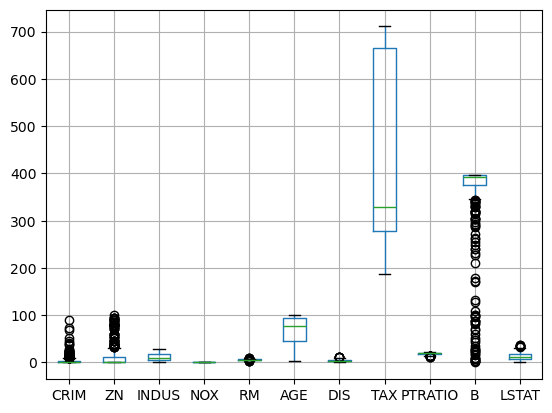

In [9]:
X.boxplot(); plt.show() #check outliers